In [1]:
from utils import *
from MySolution import MyClassifier, MyClustering, MyLabelSelection


Synthetic data shape:  (1000, 2) (1000,)


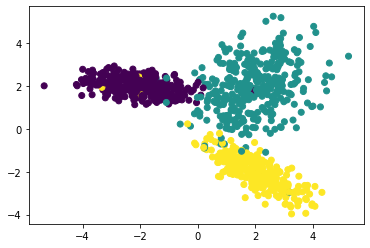

In [2]:
# Get datasets
syn_data = prepare_synthetic_data()
print("Synthetic data shape: ", syn_data['trainX'].shape, syn_data['trainY'].shape)

plt.scatter(syn_data['trainX'][:, 0], syn_data['trainX'][:, 1], c=syn_data['trainY'])

MNIST data shape:  (1000, 784) (1000,)


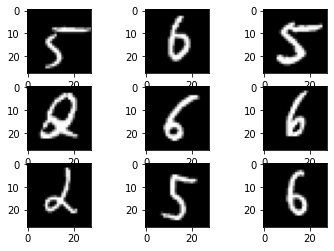

In [3]:
mnist_data = prepare_mnist_data()
print("MNIST data shape: ", mnist_data['trainX'].shape, mnist_data['trainY'].shape)

for i in range(9):	
    plt.subplot(330 + 1 + i)
    plt.imshow(mnist_data['trainX'][i].reshape(28,28), cmap='gray')
plt.show()

In [4]:
result1 = {}
syn_data = prepare_synthetic_data()
mnist_data = prepare_mnist_data()

for label, data in {'synthetic_test_accuracy': syn_data, 'mnist_test_accuracy': mnist_data}.items():
    acc_list = []
    for i in range(1):
        svm = MyClassifier(K=3, ensemble=True)
        svm.train(data['trainX'], data['trainY'])
        acc = svm.evaluate(data['testX'], data['testY'])
        acc_list.append(acc)
    acc_list = np.array(acc_list)
#     print(f"{label} mean: {np.mean(acc_list)}, variance: {np.var(acc_list)}")
    result1[label] = np.mean(acc_list)
result1

====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======


{'synthetic_test_accuracy': 0.926, 'mnist_test_accuracy': 0.878}

In [5]:
result2 = {}

for label, (data, K_list) in {'synthetic': (syn_data, [3, 5, 10]), 
                    'mnist': (mnist_data, [3, 10, 32])}.items():
    cur_result = {'K': K_list, 'clustering_nmi': [], 'classification_accuracy': []}
    for K in K_list:
        for i in range(1):
            nmi_list, acc_list = [], []
            kmeans = MyClustering(K=K)
            kmeans.train(data['trainX'], iteration=100)
            nmi = kmeans.evaluate_clustering(np.array(data['trainY'], dtype=int))
            acc = kmeans.evaluate_classification(
                np.array(data['trainY'], dtype=int),
                data['testX'],
                np.array(data['testY'], dtype=int)
            )
            nmi_list.append(nmi)
            acc_list.append(acc)
#         print(f"{label} nmi mean: {np.mean(acc_list)}, variance: {np.var(acc_list)}")
#         print(f"{label} acc mean: {np.mean(nmi_list)}, variance: {np.var(nmi_list)}")
        cur_result['clustering_nmi'].append(np.mean(nmi_list))
        cur_result['classification_accuracy'].append(np.mean(acc_list))
        result2[label] = cur_result
result2

******* K = 3


100% 100/100 [00:06<00:00, 15.33it/s]


******* K = 5


100% 100/100 [00:06<00:00, 15.00it/s]


******* K = 10


100% 100/100 [00:11<00:00,  8.77it/s]


******* K = 3


100% 100/100 [00:08<00:00, 11.54it/s]


******* K = 10


  0% 0/100 [00:00<?, ?it/s]/u/home/z/zhengton/.local/lib/python3.9/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100% 100/100 [00:16<00:00,  6.03it/s]


******* K = 32


  0% 0/100 [00:00<?, ?it/s]/u/home/z/zhengton/.local/lib/python3.9/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100% 100/100 [02:53<00:00,  1.74s/it]


{'synthetic': {'K': [3, 5, 10],
  'clustering_nmi': [0.8301743360275323,
   0.8196789328405383,
   0.8641792540032373],
  'classification_accuracy': [0.968, 0.962, 0.972]},
 'mnist': {'K': [3, 10, 32],
  'clustering_nmi': [0.2664317357498727,
   0.731642371538673,
   0.4598912505455532],
  'classification_accuracy': [0.586, 0.898, 0.884]}}

In [7]:
result3 = {}

for label, (data, percentage_list) in {'synthetic': (syn_data, [0.05,0.1,0.2,0.5,1]), 
                    'mnist': (mnist_data, [0.05,0.1,0.2,0.5,1])}.items():
    cur_result = {'label_percentage':[0.05,0.1,0.2,0.5,1], 
                  'test_accuracy(our algo)': [], 
                  'test_accuracy(random)': []}
    for percentage in percentage_list:
        acc_list_1, acc_list_2 = [], []
        for i in range(10):
            our_selectors = MyLabelSelection(percentage, algo='pseudo', K=3)
            idxs, cluster_labels = our_selectors.select(data['trainX'], True)
            model = MyClassifier(K=3, ensemble=True)
            model.train(data['trainX'][idxs], data['trainY'][idxs])
            acc = model.evaluate(data['testX'], data['testY'])
            acc_list_1.append(acc)
    
            rand_selectors = MyLabelSelection(percentage, algo='rand', K=3)
            idxs, cluster_labels = rand_selectors.select(data['trainX'], True)
            model = MyClassifier(K=3, ensemble=True)
            model.train(data['trainX'][idxs], data['trainY'][idxs])
            acc = model.evaluate(data['testX'], data['testY'])
            acc_list_2.append(acc)
        print(f"{label} our algo acc mean: {np.mean(acc_list_1)}, variance: {np.var(acc_list_1)}")
        print(f"{label} random acc mean: {np.mean(acc_list_2)}, variance: {np.var(acc_list_2)}")
        cur_result['test_accuracy(our algo)'].append(np.mean(acc_list_1))
        cur_result['test_accuracy(random)'].append(np.mean(acc_list_2))
    result3[label] = cur_result
result3

******* K = 3


100% 100/100 [00:06<00:00, 14.57it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 14.93it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 15.05it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 15.60it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 15.18it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 14.95it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 15.43it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.08it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.31it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.21it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
synthetic our algo acc mean: 0.8517999999999999, variance: 0.0031619599999999993
synthetic random acc mean: 0.8242, variance: 0.009918760000000002
******* K = 3


100% 100/100 [00:06<00:00, 16.12it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.37it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.34it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.22it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.40it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.31it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.16it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 15.59it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 15.32it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 14.67it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
synthetic our algo acc mean: 0.924, variance: 3.760000000000007e-05
synthetic random acc mean: 0.805, variance: 0.015638599999999996
******* K = 3


100% 100/100 [00:06<00:00, 14.79it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 14.89it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 15.90it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.01it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:05<00:00, 16.73it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.02it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.18it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.18it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.49it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.38it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
synthetic our algo acc mean: 0.8874000000000001, variance: 0.0020440399999999996
synthetic random acc mean: 0.881, variance: 0.004604200000000003
******* K = 3


100% 100/100 [00:06<00:00, 16.21it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 14.90it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 14.75it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 15.72it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 15.47it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.23it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.18it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.30it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 15.87it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.35it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
synthetic our algo acc mean: 0.9262, variance: 2.836000000000005e-05
synthetic random acc mean: 0.9184000000000001, variance: 0.0004982399999999998
******* K = 3


100% 100/100 [00:06<00:00, 16.23it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.20it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.02it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.24it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 15.87it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.21it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 16.24it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 15.48it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 15.91it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 15.85it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
synthetic our algo acc mean: 0.9259999999999999, variance: 1.232595164407831e-32
synthetic random acc mean: 0.9259999999999999, variance: 1.232595164407831e-32
******* K = 3


100% 100/100 [00:09<00:00, 11.00it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 12.31it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:09<00:00, 10.48it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 11.45it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:09<00:00, 11.05it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:06<00:00, 14.32it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 11.69it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 11.58it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 11.83it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 11.55it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
mnist our algo acc mean: 0.5943999999999999, variance: 0.008259839999999997
mnist random acc mean: 0.6092, variance: 0.0054113600000000005
******* K = 3


100% 100/100 [00:08<00:00, 11.87it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:07<00:00, 12.75it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 11.81it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 12.12it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:07<00:00, 13.58it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:07<00:00, 13.24it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:07<00:00, 13.61it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:07<00:00, 12.51it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======


/u/home/z/zhengton/.local/lib/python3.9/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:09<00:00, 10.72it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:07<00:00, 12.73it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
mnist our algo acc mean: 0.728, variance: 0.005073599999999999
mnist random acc mean: 0.6794000000000001, variance: 0.0004192399999999994
******* K = 3


100% 100/100 [00:07<00:00, 13.49it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:07<00:00, 12.88it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:07<00:00, 13.53it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:07<00:00, 12.80it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:07<00:00, 13.47it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:07<00:00, 12.95it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 11.75it/s]


====== Finish solving one SVM ======


/u/home/z/zhengton/.local/lib/python3.9/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:07<00:00, 13.02it/s]


====== Finish solving one SVM ======


/u/home/z/zhengton/.local/lib/python3.9/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 11.87it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 12.01it/s]
/u/home/z/zhengton/.local/lib/python3.9/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
mnist our algo acc mean: 0.8366, variance: 0.00047923999999999986
mnist random acc mean: 0.7658000000000001, variance: 0.0010195600000000016
******* K = 3


100% 100/100 [00:07<00:00, 12.88it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:07<00:00, 12.86it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 11.94it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 11.70it/s]


====== Finish solving one SVM ======


/u/home/z/zhengton/.local/lib/python3.9/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 12.34it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:07<00:00, 13.51it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 12.44it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======


/u/home/z/zhengton/.local/lib/python3.9/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:07<00:00, 13.35it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 11.78it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:07<00:00, 12.68it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
mnist our algo acc mean: 0.8736, variance: 3.4240000000000065e-05
mnist random acc mean: 0.8478, variance: 0.0004411599999999999
******* K = 3


100% 100/100 [00:07<00:00, 13.29it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:07<00:00, 12.67it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:07<00:00, 13.26it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:07<00:00, 13.47it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 12.48it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:07<00:00, 12.65it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 11.63it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======


/u/home/z/zhengton/.local/lib/python3.9/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:08<00:00, 11.64it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:07<00:00, 12.91it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
******* K = 3


100% 100/100 [00:07<00:00, 13.33it/s]


====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
mnist our algo acc mean: 0.8784000000000001, variance: 1.4400000000000027e-06
mnist random acc mean: 0.8779999999999999, variance: 1.232595164407831e-32


{'synthetic': {'label_percentage': [0.05, 0.1, 0.2, 0.5, 1],
  'test_accuracy(our algo)': [0.8517999999999999,
   0.924,
   0.8874000000000001,
   0.9262,
   0.9259999999999999],
  'test_accuracy(random)': [0.8242,
   0.805,
   0.881,
   0.9184000000000001,
   0.9259999999999999]},
 'mnist': {'label_percentage': [0.05, 0.1, 0.2, 0.5, 1],
  'test_accuracy(our algo)': [0.5943999999999999,
   0.728,
   0.8366,
   0.8736,
   0.8784000000000001],
  'test_accuracy(random)': [0.6092,
   0.6794000000000001,
   0.7658000000000001,
   0.8478,
   0.8779999999999999]}}

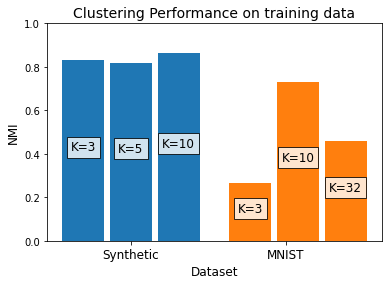

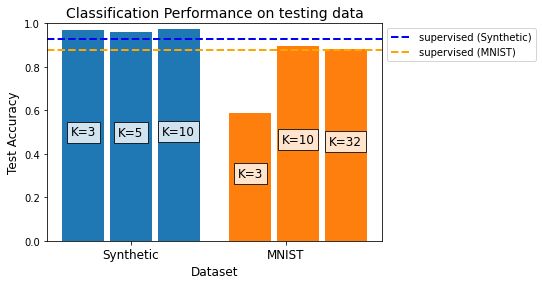

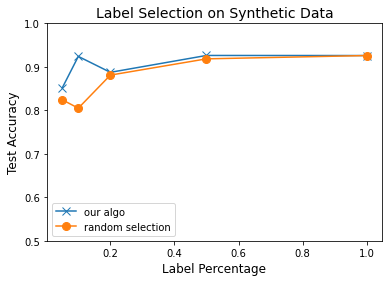

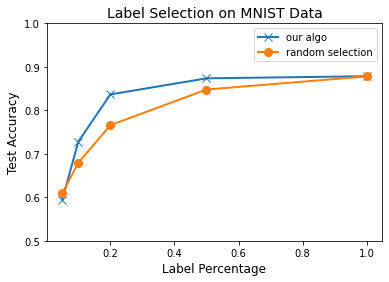

In [8]:
## TODO: Implement your solution and store the results in the following dictionaries
## Please note that the below values are given as an example to show the format, 
## you need to replace them with your values :)

# result1 = {'synthetic_test_accuracy':0.9, 'mnist_test_accuracy':0.85}

# result2 = {'synthetic':{'K':[3, 5, 10], 'clustering_nmi':[0.6,0.6,0.6], 'classification_accuracy':[0.8,0.8,0.8]},
#             'mnist':{'K':[3, 10, 32], 'clustering_nmi':[0.5,0.5,0.5], 'classification_accuracy':[0.7,0.7,0.7]}}
                                
# result3 = {'synthetic': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':[0.5,0.6,0.7,0.8,0.9], 'test_accuracy(random)':[0.4,0.5,0.6,0.7,0.8]},
#             'mnist': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':[0.5,0.5,0.7,0.7,0.7], 'test_accuracy(random)':[0.4,0.4,0.6,0.6,0.6]}}


plot_result(result1, result2, result3)

In [16]:
syn_data = prepare_synthetic_data()
mnist_data = prepare_mnist_data()

In [30]:
result2 = {}

for label, data in {'synthetic': syn_data, 
                    'mnist': mnist_data}.items():
    cur_result = {'proportion':[0.1, 0.25, 0.5, 0.75, 1.0], 'clustering_nmi': [], 'classification_accuracy': []}
    for proportion in [0.1, 0.25, 0.5, 0.75, 1.0]:
        for i in range(5):
            subset_data = data.copy()
            num_train = len(data['trainX'])
            selected_indices = np.random.choice(num_train, size=int(num_train*proportion))
            subset_data['trainX'] = data['trainX'][selected_indices]
            subset_data['trainY'] = data['trainY'][selected_indices]
            
            nmi_list, acc_list = [], []
            kmeans = MyClustering(K=3)
            kmeans.train(subset_data['trainX'], iteration=100)
            nmi = kmeans.evaluate_clustering(np.array(subset_data['trainY'], dtype=int))
            acc = kmeans.evaluate_classification(
                np.array(subset_data['trainY'], dtype=int),
                data['testX'],
                np.array(data['testY'], dtype=int)
            )
            nmi_list.append(nmi)
            acc_list.append(acc)
#         print(f"{label} nmi mean: {np.mean(acc_list)}, variance: {np.var(acc_list)}")
#         print(f"{label} acc mean: {np.mean(nmi_list)}, variance: {np.var(nmi_list)}")
        cur_result['clustering_nmi'].append(np.mean(nmi_list))
        cur_result['classification_accuracy'].append(np.mean(acc_list))
        result2[label] = cur_result
result2

******* K = 3


100% 100/100 [00:01<00:00, 65.09it/s]


******* K = 3


100% 100/100 [00:01<00:00, 68.71it/s]


******* K = 3


100% 100/100 [00:01<00:00, 72.91it/s]


******* K = 3


100% 100/100 [00:01<00:00, 71.58it/s]


******* K = 3


100% 100/100 [00:01<00:00, 70.42it/s]


******* K = 3


100% 100/100 [00:01<00:00, 51.58it/s]


******* K = 3


100% 100/100 [00:02<00:00, 46.97it/s]


******* K = 3


100% 100/100 [00:02<00:00, 46.91it/s]


******* K = 3


100% 100/100 [00:02<00:00, 48.50it/s]


******* K = 3


100% 100/100 [00:01<00:00, 50.20it/s]


******* K = 3


100% 100/100 [00:03<00:00, 30.36it/s]


******* K = 3


100% 100/100 [00:03<00:00, 28.89it/s]


******* K = 3


100% 100/100 [00:03<00:00, 27.29it/s]


******* K = 3


100% 100/100 [00:04<00:00, 24.92it/s]


******* K = 3


100% 100/100 [00:03<00:00, 29.01it/s]


******* K = 3


100% 100/100 [00:04<00:00, 20.87it/s]


******* K = 3


100% 100/100 [00:04<00:00, 20.15it/s]


******* K = 3


100% 100/100 [00:04<00:00, 20.02it/s]


******* K = 3


100% 100/100 [00:04<00:00, 20.51it/s]


******* K = 3


100% 100/100 [00:04<00:00, 21.73it/s]


******* K = 3


100% 100/100 [00:06<00:00, 14.92it/s]


******* K = 3


100% 100/100 [00:06<00:00, 16.03it/s]


******* K = 3


100% 100/100 [00:06<00:00, 16.31it/s]


******* K = 3


100% 100/100 [00:06<00:00, 15.98it/s]


******* K = 3


100% 100/100 [00:05<00:00, 17.29it/s]


******* K = 3


100% 100/100 [00:01<00:00, 63.17it/s]


******* K = 3


100% 100/100 [00:01<00:00, 63.15it/s]


******* K = 3


100% 100/100 [00:01<00:00, 65.46it/s]


******* K = 3


100% 100/100 [00:01<00:00, 65.90it/s]


******* K = 3


100% 100/100 [00:01<00:00, 62.96it/s]


******* K = 3


100% 100/100 [00:02<00:00, 41.19it/s]


******* K = 3


100% 100/100 [00:02<00:00, 41.93it/s]


******* K = 3


100% 100/100 [00:02<00:00, 41.74it/s]


******* K = 3


100% 100/100 [00:02<00:00, 43.44it/s]


******* K = 3


100% 100/100 [00:02<00:00, 43.53it/s]


******* K = 3


100% 100/100 [00:03<00:00, 25.21it/s]


******* K = 3


100% 100/100 [00:03<00:00, 26.00it/s]


******* K = 3


100% 100/100 [00:03<00:00, 26.18it/s]


******* K = 3


100% 100/100 [00:03<00:00, 28.02it/s]


******* K = 3


100% 100/100 [00:03<00:00, 26.03it/s]


******* K = 3


100% 100/100 [00:05<00:00, 17.82it/s]


******* K = 3


100% 100/100 [00:06<00:00, 15.36it/s]


******* K = 3


100% 100/100 [00:05<00:00, 17.56it/s]


******* K = 3


100% 100/100 [00:05<00:00, 17.52it/s]


******* K = 3


100% 100/100 [00:05<00:00, 17.59it/s]


******* K = 3


100% 100/100 [00:07<00:00, 12.64it/s]


******* K = 3


100% 100/100 [00:08<00:00, 12.09it/s]


******* K = 3


100% 100/100 [00:07<00:00, 12.62it/s]


******* K = 3


100% 100/100 [00:07<00:00, 13.49it/s]


******* K = 3


100% 100/100 [00:07<00:00, 12.96it/s]


{'synthetic': {'proportion': [0.1, 0.25, 0.5, 0.75, 1.0],
  'clustering_nmi': [0.7932130814198701,
   0.8372204718426678,
   0.7899123058136331,
   0.78492754624931,
   0.8232964873447767],
  'classification_accuracy': [0.968, 0.972, 0.968, 0.968, 0.958]},
 'mnist': {'proportion': [0.1, 0.25, 0.5, 0.75, 1.0],
  'clustering_nmi': [0.25098602654694285,
   0.3453922558211038,
   0.3085630709741062,
   0.45248212723930564,
   0.7064857189155269],
  'classification_accuracy': [0.532, 0.628, 0.682, 0.842, 0.848]}}

{'synthetic': {'proportion': [0.1, 0.25, 0.5, 0.75, 1.0],
  'clustering_nmi': [0.7932130814198701,
   0.8372204718426678,
   0.7899123058136331,
   0.78492754624931,
   0.8232964873447767],
  'classification_accuracy': [0.968, 0.972, 0.968, 0.968, 0.958]},
 'mnist': {'proportion': [0.1, 0.25, 0.5, 0.75, 1.0],
  'clustering_nmi': [0.25098602654694285,
   0.3453922558211038,
   0.3085630709741062,
   0.45248212723930564,
   0.7064857189155269],
  'classification_accuracy': [0.532, 0.628, 0.682, 0.842, 0.848]}}

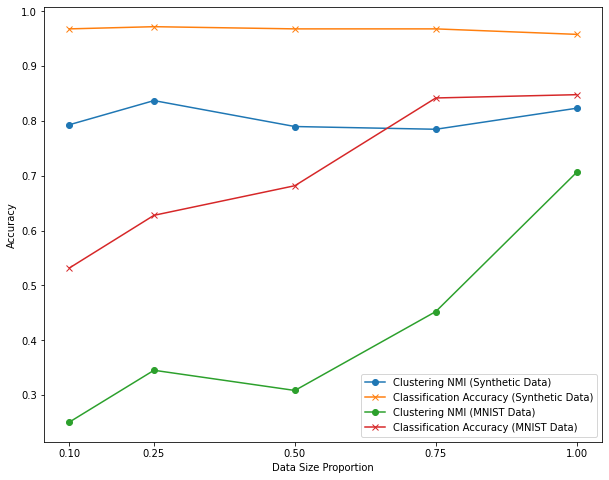

In [35]:
plt.figure(figsize=(10, 8))
size_ratios = [0.1, 0.25, 0.5, 0.75, 1.0]

# plt.title(" Learning on Synthetic Data with Different Data Size")
plt.xlabel("Data Size Proportion")
plt.ylabel("Accuracy")
label_to_true_label = {'synthetic': 'Synthetic', 'mnist': 'MNIST'}
for label, results in result2.items():
    plt.plot(size_ratios, results['clustering_nmi'], label=f"Clustering NMI ({label_to_true_label[label]} Data)", marker='o')
    plt.plot(size_ratios, results['classification_accuracy'], label=f"Classification Accuracy ({label_to_true_label[label]} Data)", marker='x')

plt.xlabel("Data Size Proportion")
plt.ylabel("Accuracy")
plt.xticks(size_ratios)

plt.legend()
plt.savefig('task2_proportion.png', bbox_inches='tight', dpi=300, facecolor='white')

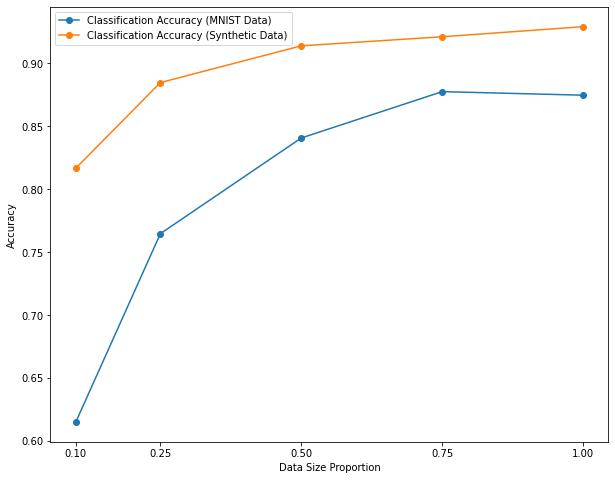

In [39]:
plt.figure(figsize=(10, 8))
task_3_results = {'mnist':[0.6152, 0.7647999999999999, 0.8408, 0.8775999999999999, 0.8747999999999999],
                  'synthetic': [0.8168000000000001, 0.8848, 0.914, 0.9212, 0.9292]}

plt.xlabel("Data Size Proportion")
plt.ylabel("Accuracy")
label_to_true_label = {'synthetic': 'Synthetic', 'mnist': 'MNIST'}
for label, results in task_3_results.items():
    plt.plot(size_ratios, results, label=f"Classification Accuracy ({label_to_true_label[label]} Data)", marker='o')
    
plt.xlabel("Data Size Proportion")
plt.ylabel("Accuracy")
plt.xticks(size_ratios)

plt.legend()
plt.savefig('task3_proportion.png', bbox_inches='tight', dpi=300, facecolor='white')